In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
data=pd.read_csv('housing_train.csv')
data.head(3)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al


In [7]:
df=data.copy()

In [8]:
df.shape

(265190, 22)

In [9]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [10]:
df1=df.drop(['id','url','region_url','image_url','description','lat','long','comes_furnished'],axis=1)

In [11]:
df1.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,laundry_options,parking_options,state
0,birmingham,1195,apartment,1908,3,2.0,1,1,1,0,0,laundry on site,street parking,al
1,birmingham,1120,apartment,1319,3,2.0,1,1,1,0,0,laundry on site,off-street parking,al
2,birmingham,825,apartment,1133,1,1.5,1,1,1,0,0,laundry on site,street parking,al
3,birmingham,800,apartment,927,1,1.0,1,1,1,0,0,laundry on site,street parking,al
4,birmingham,785,apartment,1047,2,1.0,1,1,1,0,0,laundry on site,street parking,al


In [12]:
df1.isnull().sum().sort_values(ascending=False)

parking_options            95135
laundry_options            54311
state                          1
electric_vehicle_charge        0
wheelchair_access              0
smoking_allowed                0
dogs_allowed                   0
cats_allowed                   0
baths                          0
beds                           0
sqfeet                         0
type                           0
price                          0
region                         0
dtype: int64

# Data Cleaning

In [13]:
df1['baths']=np.ceil(df1['baths'])
df1['baths']=df1['baths'].astype(int)

In [14]:
df1['baths'].sample()

23737    2
Name: baths, dtype: int32

# Handling Missing Values"

In [15]:
def missing_cat_var(df, var, modeof):
    return df.groupby(modeof)[var].transform(lambda x: x.fillna(x.mode()[0]))

In [16]:
df1['parking_options']=missing_cat_var(df,"parking_options","type")

In [17]:
df1['laundry_options']=missing_cat_var(df,"laundry_options","type")

In [18]:
df1['laundry_options'].isnull().sum()

0

# Handling Categorical Data

In [19]:
region_stats=df1.groupby('region')['region'].agg('count')

In [20]:
region_stats.max()

4246

In [21]:
region_data_less_500=region_stats[region_stats<500]
region_data_less_500

region
ames                      360
ashtabula                  39
bemidji                    49
bend                       11
binghamton                289
                         ... 
western maryland          222
western slope             377
yuba-sutter               152
yuma                      215
zanesville / cambridge      3
Name: region, Length: 157, dtype: int64

In [22]:
# Converting that datapoint to 'others' data which are contributing less than 10%

df1.region=df1.region.apply(lambda x: 'others region' if x in region_data_less_500 else x )

In [23]:
df1[df1.region=='others region'].head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,laundry_options,parking_options,state
68,others region,625,manufactured,1080,3,2,0,0,1,0,0,w/d hookups,off-street parking,al
455,others region,570,house,765,2,1,1,1,1,0,0,w/d hookups,attached garage,al
548,others region,1250,townhouse,1740,3,3,0,0,0,0,0,w/d in unit,attached garage,al
568,others region,695,manufactured,1088,3,2,1,1,1,0,0,w/d hookups,off-street parking,al
569,others region,700,house,1500,3,2,0,0,0,0,0,w/d hookups,attached garage,al


In [24]:
state_stats=df1.groupby('state')['state'].agg('count')
state_stats.sort_values(ascending=False)
state_data_less_2800=state_stats[state_stats<2800]
state_data_less_2800

state
ak    2169
dc    2502
de    2048
hi    1840
me     420
mo    2158
mt    1339
ne    2697
nh    1761
ok      49
or      44
Name: state, dtype: int64

In [25]:
df1.state=df1.state.apply( lambda x: 'others state' if x in state_data_less_2800 else x)

In [26]:
df1[df1.state=='others state'].head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,laundry_options,parking_options,state
1058,anchorage / mat-su,975,apartment,1100,2,1,1,1,1,0,0,laundry in bldg,off-street parking,others state
1087,anchorage / mat-su,1045,apartment,1100,2,1,1,0,1,0,0,w/d in unit,off-street parking,others state
1097,anchorage / mat-su,1045,apartment,1100,2,1,1,0,1,0,0,w/d in unit,off-street parking,others state
1125,anchorage / mat-su,1265,apartment,840,3,1,1,1,1,0,0,w/d in unit,off-street parking,others state
1172,anchorage / mat-su,825,apartment,450,0,1,1,1,0,0,0,w/d in unit,off-street parking,others state


In [27]:
type_stats=df1.groupby('type')['type'].agg('count')
type_stats.sort_values(ascending=False)

type
apartment          218032
house               23741
townhouse           10381
condo                4864
duplex               3452
manufactured         3008
cottage/cabin         702
loft                  511
flat                  349
in-law                145
land                    4
assisted living         1
Name: type, dtype: int64

In [28]:
type_data_less_1000=type_stats[type_stats<1000]
type_data_less_1000

type
assisted living      1
cottage/cabin      702
flat               349
in-law             145
land                 4
loft               511
Name: type, dtype: int64

In [29]:
df1.type=df1.type.apply(lambda x: 'others type' if x in type_data_less_1000 else x)

In [30]:
df1[df1.type=='others type'].head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,laundry_options,parking_options,state
3059,huntsville / decatur,1775,others type,2027,3,2,1,1,0,1,0,w/d hookups,attached garage,al
3124,mobile,1000,others type,25,1,1,0,0,0,0,0,no laundry on site,off-street parking,al
3669,mobile,1200,others type,1300,2,1,0,0,0,0,0,w/d hookups,off-street parking,al
4368,mobile,1100,others type,1100,1,1,0,0,0,0,0,no laundry on site,off-street parking,al
6335,anchorage / mat-su,1450,others type,500,0,1,0,1,0,0,0,laundry in bldg,street parking,others state


In [31]:
df1.groupby('laundry_options')['laundry_options'].agg('count')

laundry_options
laundry in bldg        27816
laundry on site        39186
no laundry on site      2551
w/d hookups            57064
w/d in unit           138573
Name: laundry_options, dtype: int64

In [32]:
df1.groupby('parking_options')['parking_options'].agg('count')

parking_options
attached garage        34159
carport                28685
detached garage        12798
no parking              1973
off-street parking    176883
street parking         10570
valet parking            122
Name: parking_options, dtype: int64

In [33]:
df2=df1.copy()

# Handling Outlier

## Handling Outlier with IQR

# Removing Price outlier

In [34]:
df2.price.describe()

count    2.651900e+05
mean     1.227285e+04
std      5.376352e+06
min      0.000000e+00
25%      8.170000e+02
50%      1.060000e+03
75%      1.450000e+03
max      2.768307e+09
Name: price, dtype: float64

In [35]:
# With the help of Inter Quartile Range tying to remove outlier

Q1=df2.price.quantile(0.25)
Q3=df2.price.quantile(0.75)
IQR=Q3-Q1
Q1,Q3,IQR

(817.0, 1450.0, 633.0)

In [291]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-132.5, 2399.5)

In [292]:
outlier=df2[(df2.price>lower_limit) & (df2.price<upper_limit)]

<AxesSubplot:xlabel='price', ylabel='Density'>

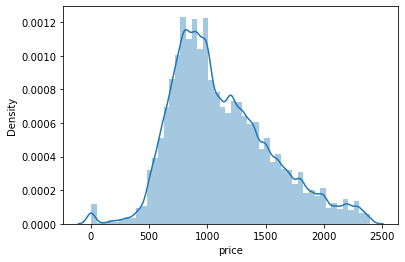

In [293]:
sns.distplot(outlier['price'])

<AxesSubplot:xlabel='price'>

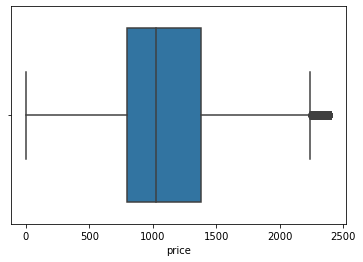

In [294]:
sns.boxplot(outlier['price'])

In [295]:
lower_limit=outlier.price.mean()-2*outlier.price.std()
upper_limit=outlier.price.mean()+2*outlier.price.std()
lower_limit,upper_limit

(262.04785164888574, 1974.9893931051924)

In [296]:
std_outlier=outlier[(outlier.price<upper_limit) & (outlier.price>lower_limit)]

<AxesSubplot:xlabel='price'>

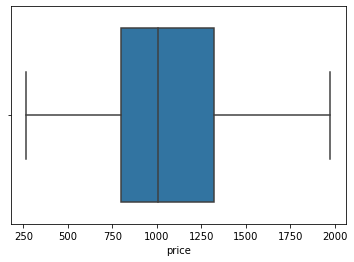

In [297]:
sns.boxplot(std_outlier['price'])

<AxesSubplot:xlabel='price', ylabel='Density'>

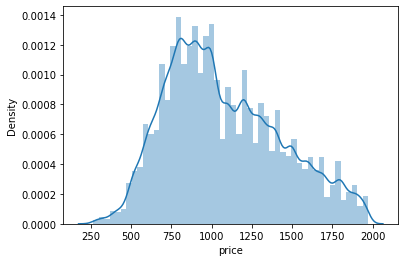

In [298]:
sns.distplot(std_outlier['price'])

In [299]:
df3=std_outlier.copy()

In [300]:
df3.price.describe()

count    237699.000000
mean       1075.535076
std         356.927360
min         264.000000
25%         800.000000
50%        1004.000000
75%        1321.000000
max        1974.000000
Name: price, dtype: float64

# Removing Sqfeet Outlier

In [301]:
Q1=df3.sqfeet.quantile(0.25)
Q3=df3.sqfeet.quantile(0.75)
IQR=Q3-Q1
Q1,Q3,IQR

(750.0, 1125.0, 375.0)

In [302]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(187.5, 1687.5)

In [303]:
outlier=df3[(df3.sqfeet>lower_limit) & (df3.sqfeet<upper_limit)]

<AxesSubplot:xlabel='sqfeet', ylabel='Density'>

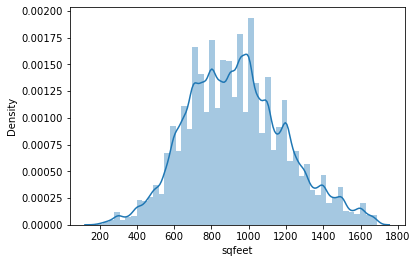

In [304]:
sns.distplot(outlier['sqfeet'])

<AxesSubplot:xlabel='sqfeet'>

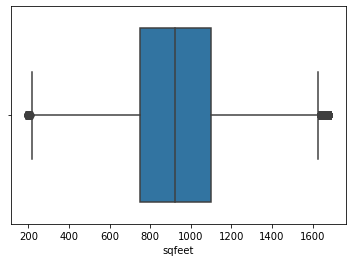

In [305]:
sns.boxplot(outlier['sqfeet'])

In [306]:
lower_limit=outlier.sqfeet.mean()-2.5*outlier.sqfeet.std()
upper_limit=outlier.sqfeet.mean()+2.5*outlier.sqfeet.std()
lower_limit,upper_limit

(274.38946259571173, 1593.9871091070936)

In [307]:
std_outlier=outlier[(outlier.sqfeet>lower_limit) & (outlier.sqfeet<upper_limit)]

<AxesSubplot:xlabel='sqfeet'>

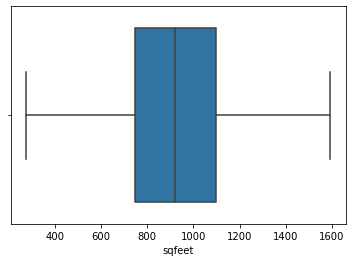

In [308]:
sns.boxplot(std_outlier['sqfeet'])

<AxesSubplot:xlabel='sqfeet', ylabel='Density'>

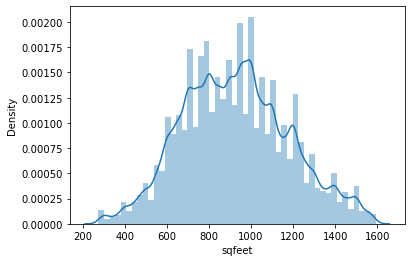

In [309]:
sns.distplot(std_outlier['sqfeet'])

In [310]:
df4=std_outlier.copy()

In [311]:
df4.sqfeet.describe()

count    225906.000000
mean        927.344944
std         252.139274
min         275.000000
25%         746.000000
50%         920.000000
75%        1100.000000
max        1593.000000
Name: sqfeet, dtype: float64

# Removing Beds Outlier

In [312]:
df4.beds.unique()

array([3, 1, 2, 4, 0, 5, 6, 8], dtype=int64)

<AxesSubplot:xlabel='beds'>

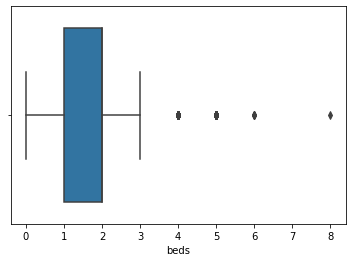

In [313]:
sns.boxplot(df4.beds)

In [314]:
min_thresold,max_thresold=df4.beds.quantile([0.1,0.99])
min_thresold,max_thresold

(1.0, 4.0)

In [315]:
beds_outlier=df4[(df4.beds<max_thresold) & (df4.beds>=min_thresold)]

In [316]:
df4=beds_outlier.copy()

<AxesSubplot:xlabel='beds'>

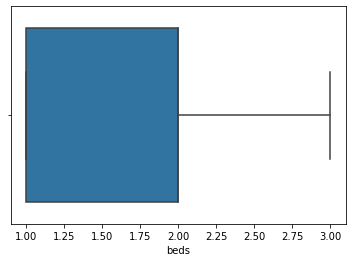

In [317]:
sns.boxplot(df4.beds)

In [318]:
df4.beds.describe()

count    216204.000000
mean          1.816900
std           0.687886
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: beds, dtype: float64

# Removing Baths Outlier

<AxesSubplot:xlabel='baths'>

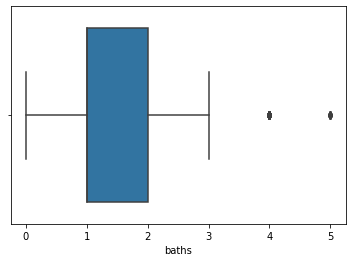

In [319]:
sns.boxplot(df4.baths)

In [320]:
baths_min_thresold,baths_max_thresold=df4.baths.quantile([0.01,0.99])
baths_min_thresold,baths_max_thresold

(1.0, 3.0)

In [321]:
baths_outlier=df4[(df4.baths<=baths_max_thresold) & (df4.baths>=baths_min_thresold)]

In [322]:
df4=baths_outlier.copy()

<AxesSubplot:xlabel='baths'>

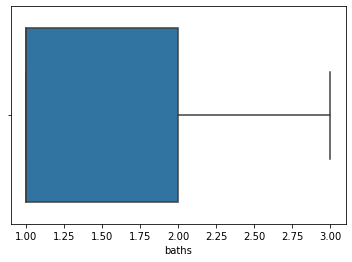

In [323]:
sns.boxplot(df4.baths)

In [324]:
df4.baths.describe()

count    214382.000000
mean          1.469536
std           0.543740
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           3.000000
Name: baths, dtype: float64

In [325]:
df4.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge
count,214382.000000,214382.000000,214382.000000,214382.000000,214382.000000,214382.000000,214382.000000,214382.000000,214382.000000
mean,1072.366840,934.504389,1.817307,1.469536,0.734754,0.711398,0.760736,0.069166,0.008970
std,347.731752,238.720397,0.687697,0.543740,0.441465,0.453113,0.426635,0.253737,0.094284
min,265.000000,275.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,800.000000,750.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1000.000000,924.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,1310.000000,1100.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1974.000000,1593.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [343]:
df4.shape

(214381, 14)

# Encoding Categorical Variable

In [341]:
df4=df4.dropna(subset=['state'])

In [383]:
len(df4.columns)

14

In [388]:
df4.head(2)

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,laundry_options,parking_options,state
1,birmingham,1120,apartment,1319,3,2,1,1,1,0,0,laundry on site,off-street parking,al
2,birmingham,825,apartment,1133,1,2,1,1,1,0,0,laundry on site,street parking,al


In [398]:
region_dummies=pd.get_dummies(df4.region)
del region_dummies['others region']
region_dummies.head(2)

,SF bay area,akron / canton,albany,albuquerque,anchorage / mat-su,ann arbor,annapolis,asheville,athens,atlanta,...,tucson,tuscaloosa,valdosta,ventura county,"washington, DC",western massachusetts,wichita,wilmington,winston-salem,worcester / central MA
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [400]:
type_dummies=pd.get_dummies(df4.type)
del type_dummies['others type']
type_dummies.head(2)

,apartment,condo,duplex,house,manufactured,townhouse
1,1,0,0,0,0,0
2,1,0,0,0,0,0


In [402]:
laundry_dummies=pd.get_dummies(df4.laundry_options)
del laundry_dummies['no laundry on site']
laundry_dummies.sample()

,laundry in bldg,laundry on site,w/d hookups,w/d in unit
173630,0,0,0,1


In [403]:
parking_dummies=pd.get_dummies(df4.parking_options)
del parking_dummies['no parking']
parking_dummies.sample()

,attached garage,carport,detached garage,off-street parking,street parking,valet parking
54239,0,0,0,1,0,0


In [404]:
state_dummies=pd.get_dummies(df4.state)
del state_dummies['others state']
state_dummies.head(2)

,al,ar,az,ca,co,ct,fl,ga,ia,id,...,mi,mn,ms,nc,nd,nj,nm,nv,ny,oh
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [375]:
df5=df4.copy()

In [405]:
df6=pd.concat([df5,region_dummies,type_dummies,laundry_dummies,parking_dummies,state_dummies],axis='columns')
df6.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,...,mi,mn,ms,nc,nd,nj,nm,nv,ny,oh
1,birmingham,1120,apartment,1319,3,2,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,birmingham,825,apartment,1133,1,2,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,birmingham,800,apartment,927,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,birmingham,785,apartment,1047,2,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,birmingham,900,apartment,1298,2,2,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [407]:
df7=df6.drop(['region','type','laundry_options','parking_options','state'],axis=1)

In [409]:
df7.head(2)

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,SF bay area,...,mi,mn,ms,nc,nd,nj,nm,nv,ny,oh
1,1120,1319,3,2,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,825,1133,1,2,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [410]:
final_data=df7.copy()

In [411]:
final_data.shape

(214381, 193)

In [413]:
final_data.to_csv('housing_final_data.csv',index=False)